In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置随机数种子以便结果可重复
np.random.seed(42)

# 生成模拟数据：地下管道的起点、终点、半径
num_pipes = 10  # 管道数量
pipes = []
for i in range(num_pipes):
    # 随机生成管道起点和终点（三维坐标）
    start = np.random.rand(3) * 100
    end = start + np.random.rand(3) * 20
    radius = np.random.rand() * 2 + 1  # 管道半径在1到3之间
    pipes.append({'start': start, 'end': end, 'radius': radius})

# 打印前两个管道的数据
for i in range(2):
    print(f"管道 {i+1} 的起点：{pipes[i]['start']}, 终点：{pipes[i]['end']}, 半径：{pipes[i]['radius']}")

管道 1 的起点：[37.45401188 95.07143064 73.19939418], 终点：[49.42718157 98.19180345 76.31928459], 半径：1.116167224336399
管道 2 的起点：[86.61761458 60.11150117 70.80725778], 终点：[87.02930446 79.50969822 87.4561106 ], 半径：1.4246782213565523


In [2]:
def is_collision(pipe1, pipe2):
    """
    检测两根管道是否发生碰撞
    :param pipe1: 第一根管道的字典，包含起点、终点、半径
    :param pipe2: 第二根管道的字典，包含起点、终点、半径
    :return: 是否发生碰撞（布尔值）
    """
    # 获取两根管道的起点和终点
    p1_start = pipe1['start']
    p1_end = pipe1['end']
    p2_start = pipe2['start']
    p2_end = pipe2['end']

    # 计算两根管道的轴线之间的最短距离
    # 使用向量叉积计算两线段之间的距离
    line1 = p1_end - p1_start
    line2 = p2_end - p2_start
    cross_product = np.cross(line1, line2)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(line2)

    # 如果最短距离小于等于两根管道半径之和，则认为发生碰撞
    if distance <= (pipe1['radius'] + pipe2['radius']):
        return True
    else:
        return False

In [3]:
# 碰撞检测
collision_count = 0
collision_pairs = []

for i in range(num_pipes):
    for j in range(i + 1, num_pipes):
        if is_collision(pipes[i], pipes[j]):
            collision_count += 1
            collision_pairs.append((i, j))

print(f"总共有 {collision_count} 对管道发生碰撞")
print("发生碰撞的管道对为：", collision_pairs)

总共有 4 对管道发生碰撞
发生碰撞的管道对为： [(2, 5), (2, 7), (2, 8), (7, 8)]


c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7

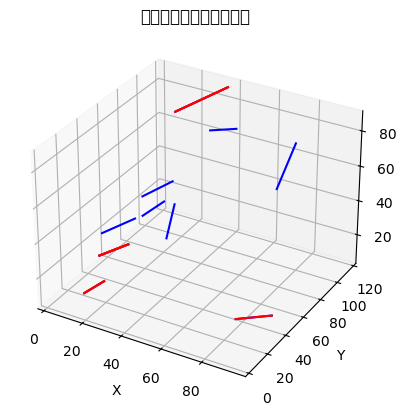

优化建议：
对管道 3 和管道 6 进行调整，例如改变管道路径或缩小管道半径
对管道 3 和管道 8 进行调整，例如改变管道路径或缩小管道半径
对管道 3 和管道 9 进行调整，例如改变管道路径或缩小管道半径
对管道 8 和管道 9 进行调整，例如改变管道路径或缩小管道半径


In [4]:
# 可视化管道网络
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for pipe in pipes:
    ax.plot([pipe['start'][0], pipe['end'][0]],
            [pipe['start'][1], pipe['end'][1]],
            [pipe['start'][2], pipe['end'][2]], 'b-')

# 标记发生碰撞的管道
for pair in collision_pairs:
    p1 = pipes[pair[0]]
    p2 = pipes[pair[1]]
    ax.plot([p1['start'][0], p1['end'][0]],
            [p1['start'][1], p1['end'][1]],
            [p1['start'][2], p1['end'][2]], 'r-')
    ax.plot([p2['start'][0], p2['end'][0]],
            [p2['start'][1], p2['end'][1]],
            [p2['start'][2], p2['end'][2]], 'r-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('地下管道网络及碰撞情况')
plt.show()

# 优化建议
print("优化建议：")
for pair in collision_pairs:
    print(f"对管道 {pair[0]+1} 和管道 {pair[1]+1} 进行调整，例如改变管道路径或缩小管道半径")

C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing fr

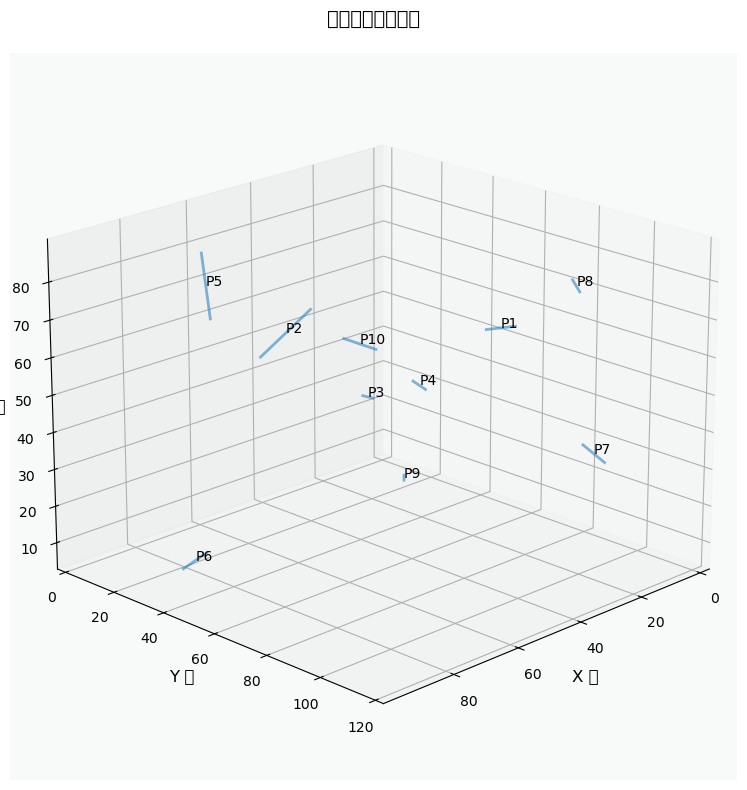

C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 30896 (\N{CJK UNIFIED IDEOGRAPH-78B0}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 25758 (\N{CJK UNIFIED IDEOGRAPH-649E}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_47728\1018075033.py:58: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing fr

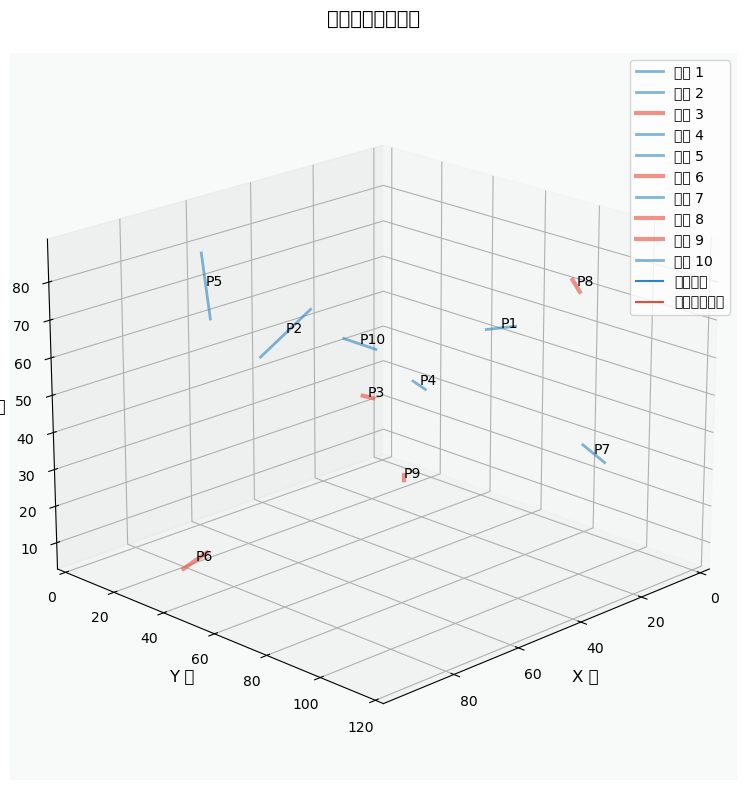


=== 碰撞分析报告 ===
检测到 4 处碰撞

碰撞 #1:
管道 3 和管道 6 发生碰撞
管道 3 起点: [18.18249672 18.34045099 30.4242243 ], 终点: [28.67762535 26.97935136 36.2488071 ]
管道 6 起点: [80.83973481 30.46137692  9.7672114 ], 终点: [94.52439534 39.26442679 12.2079761 ]
预估碰撞位置: (55.56, 28.76, 22.16)

碰撞 #2:
管道 3 和管道 8 发生碰撞
管道 3 起点: [18.18249672 18.34045099 30.4242243 ], 终点: [28.67762535 26.97935136 36.2488071 ]
管道 8 起点: [18.48544555 96.95846278 77.51328234], 终点: [ 37.27542438 114.85500979  89.47128191]
预估碰撞位置: (25.66, 64.28, 58.41)

碰撞 #3:
管道 3 和管道 9 发生碰撞
管道 3 起点: [18.18249672 18.34045099 30.4242243 ], 终点: [28.67762535 26.97935136 36.2488071 ]
管道 9 起点: [ 8.84925021 19.59828624  4.52272889], 终点: [15.35585682 27.37183204  9.94970953]
预估碰撞位置: (17.77, 23.07, 20.29)

碰撞 #4:
管道 8 和管道 9 发生碰撞
管道 8 起点: [18.48544555 96.95846278 77.51328234], 终点: [ 37.27542438 114.85500979  89.47128191]
管道 9 起点: [ 8.84925021 19.59828624  4.52272889], 终点: [15.35585682 27.37183204  9.94970953]
预估碰撞位置: (19.99, 64.70, 45.36)

=== 优化建议 ===

管道 3 和管道 6 的调整方案：

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def visualize_pipeline_network(pipes, collision_pairs=None, title='管道网络可视化', alpha=0.6):
    """可视化管道网络的函数"""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 设置更好看的颜色方案
    normal_color = '#2E86C1'  # 正常管道颜色
    collision_color = '#E74C3C'  # 碰撞管道颜色
    
    # 绘制所有管道
    for i, pipe in enumerate(pipes):
        color = normal_color
        linewidth = 2
        
        # 如果存在碰撞对，检查当前管道是否在碰撞对中
        if collision_pairs:
            if any(i in pair for pair in collision_pairs):
                color = collision_color
                linewidth = 3
        
        # 绘制管道
        ax.plot([pipe['start'][0], pipe['end'][0]],
                [pipe['start'][1], pipe['end'][1]],
                [pipe['start'][2], pipe['end'][2]],
                color=color, linewidth=linewidth, alpha=alpha,
                label=f'管道 {i+1}')
        
        # 添加管道编号标签
        mid_point = [(pipe['start'][j] + pipe['end'][j])/2 for j in range(3)]
        ax.text(mid_point[0], mid_point[1], mid_point[2], f'P{i+1}',
                color='black', fontsize=10)

    # 美化图表
    ax.set_xlabel('X 轴', fontsize=12)
    ax.set_ylabel('Y 轴', fontsize=12)
    ax.set_zlabel('Z 轴', fontsize=12)
    ax.set_title(title, fontsize=14, pad=20)
    
    # 添加网格
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # 设置背景色
    ax.set_facecolor('#F8F9F9')
    
    # 调整视角
    ax.view_init(elev=20, azim=45)
    
    # 添加图例
    if collision_pairs:
        ax.plot([], [], color=normal_color, label='正常管道')
        ax.plot([], [], color=collision_color, label='发生碰撞管道')
        plt.legend(loc='upper right')

    plt.tight_layout()
    return fig

def print_collision_analysis(collision_pairs, pipes):
    """打印碰撞分析报告"""
    print("\n=== 碰撞分析报告 ===")
    print(f"检测到 {len(collision_pairs)} 处碰撞")
    
    for i, pair in enumerate(collision_pairs, 1):
        p1, p2 = pipes[pair[0]], pipes[pair[1]]
        print(f"\n碰撞 #{i}:")
        print(f"管道 {pair[0]+1} 和管道 {pair[1]+1} 发生碰撞")
        print(f"管道 {pair[0]+1} 起点: {p1['start']}, 终点: {p1['end']}")
        print(f"管道 {pair[1]+1} 起点: {p2['start']}, 终点: {p2['end']}")
        
        # 计算碰撞点的大致位置（简化计算）
        collision_point = [
            (p1['start'][j] + p1['end'][j] + p2['start'][j] + p2['end'][j])/4 
            for j in range(3)
        ]
        print(f"预估碰撞位置: ({collision_point[0]:.2f}, {collision_point[1]:.2f}, {collision_point[2]:.2f})")

def generate_optimization_suggestions(collision_pairs):
    """生成优化建议"""
    print("\n=== 优化建议 ===")
    for pair in collision_pairs:
        print(f"\n管道 {pair[0]+1} 和管道 {pair[1]+1} 的调整方案：")
        suggestions = [
            f"1. 考虑调整管道 {pair[0]+1} 的路径，可以尝试改变其高度或走向",
            f"2. 评估管道 {pair[1]+1} 是否可以绕行",
            "3. 检查是否可以减小管道直径",
            "4. 考虑使用多段短管道替代当前路径"
        ]
        for suggestion in suggestions:
            print(suggestion)

# 使用示例：
# 1. 首先显示原始管道网络
fig1 = visualize_pipeline_network(pipes, title='原始管道网络布局')
plt.show()

# 2. 显示碰撞检测结果
fig2 = visualize_pipeline_network(pipes, collision_pairs, title='管道碰撞检测结果')
plt.show()

# 3. 打印详细分析
print_collision_analysis(collision_pairs, pipes)

# 4. 生成优化建议
generate_optimization_suggestions(collision_pairs)

C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) miss

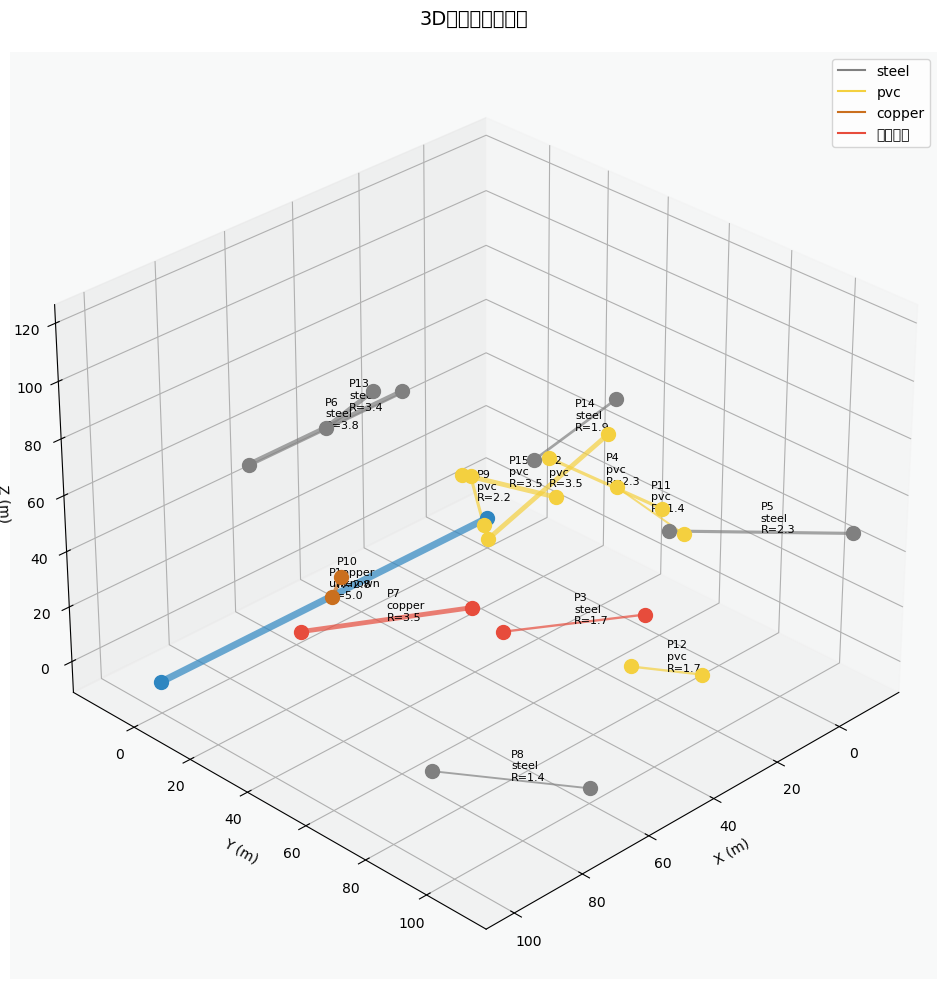


=== 管道网络分析报告 ===
总管道数量: 15

材料使用统计:
- unknown: 1根管道
- pvc: 6根管道
- steel: 6根管道
- copper: 2根管道

总管网长度: 549.41米

检测到的碰撞数量: 1

严重碰撞详情(严重程度由高到低):

碰撞 #1
涉及管道: 3 和 7
碰撞严重度: 79.2%
管道间距: 1.49米


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
import matplotlib.colors as mcolors

def create_complex_pipe_network(n_pipes=15, space_size=100):
    """创建更复杂的管道网络"""
    pipes = []
    # 创建主干管道
    main_pipe = {
        'start': np.array([0, 0, 0]),
        'end': np.array([space_size, 0, 0]),
        'radius': 5.0,
        'type': 'main'
    }
    pipes.append(main_pipe)
    
    # 添加分支管道
    for i in range(n_pipes - 1):
        start_point = np.random.rand(3) * space_size
        direction = np.random.rand(3) * 2 - 1  # 随机方向
        length = np.random.rand() * 30 + 20    # 随机长度
        direction = direction / np.linalg.norm(direction) * length
        end_point = start_point + direction
        
        pipe = {
            'start': start_point,
            'end': end_point,
            'radius': np.random.rand() * 3 + 1,  # 随机管道半径
            'type': 'branch',
            'material': np.random.choice(['steel', 'pvc', 'copper'])  # 随机材料
        }
        pipes.append(pipe)
    
    return pipes

def detect_collisions(pipes, tolerance=2.0):
    """改进的碰撞检测算法"""
    collision_pairs = []
    for i in range(len(pipes)):
        for j in range(i + 1, len(pipes)):
            # 计算两管道之间的最短距离
            v1 = pipes[i]['end'] - pipes[i]['start']
            v2 = pipes[j]['end'] - pipes[j]['start']
            p1 = pipes[i]['start']
            p2 = pipes[j]['start']
            
            # 计算最短距离
            d = np.abs(np.cross(v1, v2)).sum() / np.linalg.norm(v2)
            
            # 考虑管道半径进行碰撞判定
            min_distance = pipes[i]['radius'] + pipes[j]['radius'] + tolerance
            
            if d < min_distance:
                collision_pairs.append({
                    'pair': (i, j),
                    'distance': d,
                    'severity': (min_distance - d) / min_distance
                })
    
    return sorted(collision_pairs, key=lambda x: x['severity'], reverse=True)

def visualize_network_3d(pipes, collision_info=None, show_radius=True):
    """增强的3D可视化函数"""
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # 创建颜色映射
    material_colors = {
        'steel': '#808080',
        'pvc': '#F4D03F',
        'copper': '#CA6F1E'
    }
    
    # 绘制管道
    for i, pipe in enumerate(pipes):
        # 基础颜色基于材料
        color = material_colors.get(pipe.get('material'), '#2E86C1')
        
        # 如果是碰撞管道，改变颜色
        if collision_info and any(i in pair['pair'] for pair in collision_info):
            color = '#E74C3C'
        
        # 绘制管道主体
        ax.plot([pipe['start'][0], pipe['end'][0]],
                [pipe['start'][1], pipe['end'][1]],
                [pipe['start'][2], pipe['end'][2]],
                color=color, linewidth=pipe['radius'], alpha=0.7)
        
        # 在管道端点添加球形标记
        ax.scatter(pipe['start'][0], pipe['start'][1], pipe['start'][2], 
                  color=color, s=100)
        ax.scatter(pipe['end'][0], pipe['end'][1], pipe['end'][2], 
                  color=color, s=100)
        
        # 添加管道标签
        mid_point = (pipe['start'] + pipe['end']) / 2
        ax.text(mid_point[0], mid_point[1], mid_point[2], 
                f'P{i+1}\n{pipe.get("material", "unknown")}\nR={pipe["radius"]:.1f}',
                color='black', fontsize=8)
    
    # 设置图表样式
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')
    ax.set_title('3D管道网络分析图', pad=20, fontsize=14)
    
    # 添加图例
    legend_elements = [plt.Line2D([0], [0], color=color, label=material)
                      for material, color in material_colors.items()]
    legend_elements.append(plt.Line2D([0], [0], color='#E74C3C', label='碰撞管道'))
    ax.legend(handles=legend_elements)
    
    # 设置网格和背景
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_facecolor('#F8F9F9')
    
    # 优化视角
    ax.view_init(elev=30, azim=45)
    plt.tight_layout()
    
    return fig

def analyze_network(pipes, collision_info):
    """网络分析报告生成器"""
    print("\n=== 管道网络分析报告 ===")
    print(f"总管道数量: {len(pipes)}")
    
    # 材料统计
    materials = {}
    total_length = 0
    for pipe in pipes:
        mat = pipe.get('material', 'unknown')
        materials[mat] = materials.get(mat, 0) + 1
        # 计算管道长度
        length = np.linalg.norm(pipe['end'] - pipe['start'])
        total_length += length
    
    print("\n材料使用统计:")
    for mat, count in materials.items():
        print(f"- {mat}: {count}根管道")
    
    print(f"\n总管网长度: {total_length:.2f}米")
    
    if collision_info:
        print(f"\n检测到的碰撞数量: {len(collision_info)}")
        print("\n严重碰撞详情(严重程度由高到低):")
        for i, collision in enumerate(collision_info[:5], 1):
            print(f"\n碰撞 #{i}")
            print(f"涉及管道: {collision['pair'][0]+1} 和 {collision['pair'][1]+1}")
            print(f"碰撞严重度: {collision['severity']*100:.1f}%")
            print(f"管道间距: {collision['distance']:.2f}米")

# 创建并分析管道网络
pipes = create_complex_pipe_network(n_pipes=15)
collision_info = detect_collisions(pipes)

# 可视化结果
fig = visualize_network_3d(pipes, collision_info)
plt.show()

# 输出分析报告
analyze_network(pipes, collision_info)

C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_44896\2896825459.py:121: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) miss

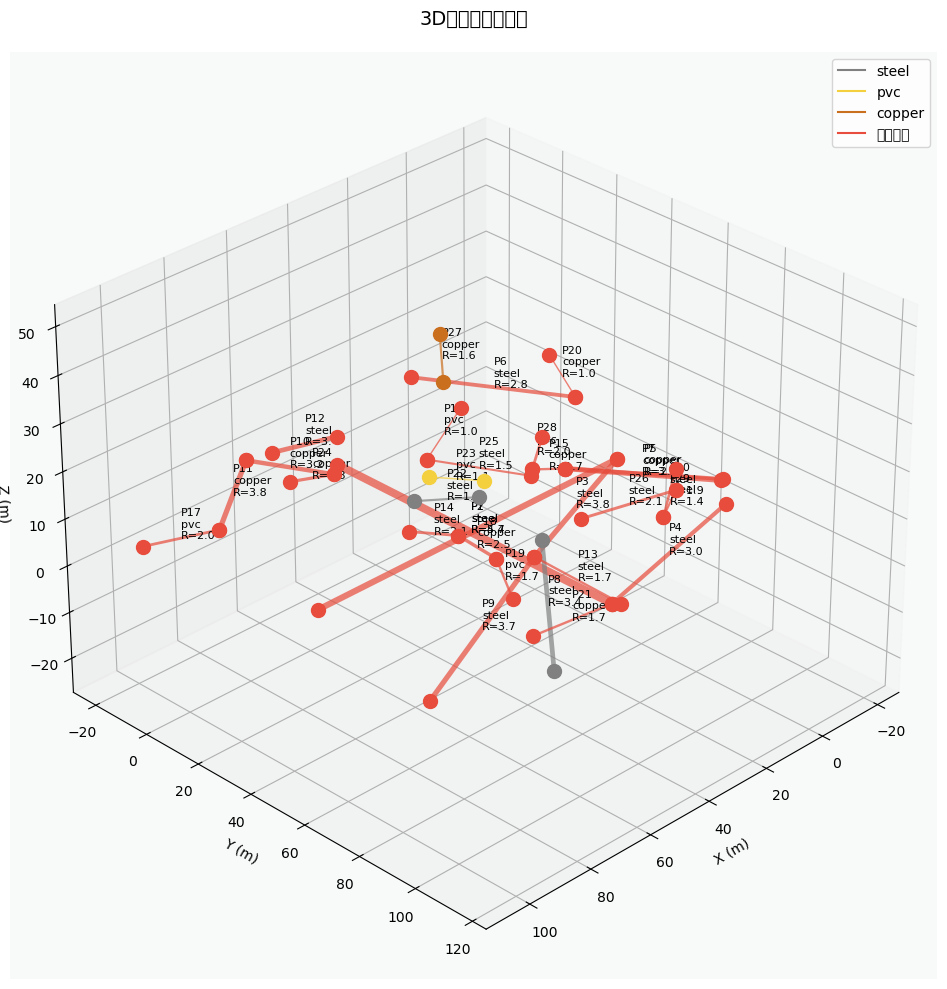


=== 管道网络分析报告 ===
总管道数量: 30

材料使用统计:
- steel: 15根管道
- copper: 10根管道
- pvc: 5根管道

总管网长度: 935.60米

检测到的碰撞数量: 24

严重碰撞详情(严重程度由高到低):

碰撞 #1
涉及管道: 1 和 3
碰撞严重度: 100.0%
管道间距: 0.00米

碰撞 #2
涉及管道: 2 和 4
碰撞严重度: 100.0%
管道间距: 0.00米

碰撞 #3
涉及管道: 2 和 21
碰撞严重度: 100.0%
管道间距: 0.00米

碰撞 #4
涉及管道: 3 和 9
碰撞严重度: 100.0%
管道间距: 0.00米

碰撞 #5
涉及管道: 3 和 13
碰撞严重度: 100.0%
管道间距: 0.00米


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
import matplotlib.colors as mcolors
from scipy.spatial import distance

class PipeNetwork:
    def __init__(self, space_size=100):
        self.space_size = space_size
        self.grid_size = 5
        self.pipes = []
        self.junction_points = []  # 改为列表而不是集合
        
        # 管道规格定义
        self.pipe_specs = {
            'main': {
                'radius': (4.0, 6.0),
                'materials': ['steel'],
                'pressure': (0.8, 1.2),
                'flow_rate': (100, 200)
            },
            'secondary': {
                'radius': (2.5, 4.0),
                'materials': ['steel', 'copper'],
                'pressure': (0.5, 0.8),
                'flow_rate': (50, 100)
            },
            'branch': {
                'radius': (1.0, 2.5),
                'materials': ['pvc', 'copper', 'steel'],
                'pressure': (0.2, 0.5),
                'flow_rate': (10, 50)
            }
        }

    def _create_pipe(self, start, end, pipe_type):
        """创建单个管道"""
        specs = self.pipe_specs[pipe_type]
        return {
            'start': start,
            'end': end,
            'radius': np.random.uniform(*specs['radius']),
            'type': pipe_type,
            'material': np.random.choice(specs['materials']),
            'pressure': np.random.uniform(*specs['pressure']),
            'flow_rate': np.random.uniform(*specs['flow_rate']),
            'bends': []
        }

    def _get_random_junction_point(self):
        """获取随机连接点"""
        if len(self.junction_points) == 0 or np.random.random() > 0.7:
            point = np.random.rand(3) * [self.space_size, self.space_size, self.space_size/2]
            self.junction_points.append(point)
            return point
        else:
            return self.junction_points[np.random.randint(len(self.junction_points))]

    def _create_main_pipeline_system(self):
        """创建主干管道系统"""
        # 水平主干管
        start_point = np.array([0, self.space_size/2, 10])
        end_point = np.array([self.space_size, self.space_size/2, 10])
        self.junction_points.extend([start_point, end_point])
        
        main_pipe = self._create_pipe(
            start=start_point,
            end=end_point,
            pipe_type='main'
        )
        self.pipes.append(main_pipe)
        
        # 垂直主干管
        start_point = np.array([self.space_size/2, 0, 10])
        end_point = np.array([self.space_size/2, self.space_size, 10])
        self.junction_points.extend([start_point, end_point])
        
        vert_main = self._create_pipe(
            start=start_point,
            end=end_point,
            pipe_type='main'
        )
        self.pipes.append(vert_main)

    def _get_valid_direction(self):
        """获取有效的管道方向"""
        direction = np.random.rand(3) * 2 - 1
        direction[2] *= 0.3  # 限制垂直方向的变化
        return direction / np.linalg.norm(direction)

    def _add_pipe_bends(self):
        """添加管道弯头"""
        for pipe in self.pipes:
            if np.random.random() > 0.5:
                n_bends = np.random.randint(1, 3)
                for _ in range(n_bends):
                    t = np.random.random()  # 在管道上的相对位置
                    bend_point = pipe['start'] + t * (pipe['end'] - pipe['start'])
                    pipe['bends'].append({
                        'position': bend_point,
                        'angle': np.random.uniform(30, 90)
                    })

    def create_complex_network(self, n_pipes=30):
        """创建复杂的管道网络"""
        self._create_main_pipeline_system()
        
        # 创建次级管道
        for _ in range(n_pipes//3):
            start = self._get_random_junction_point()
            direction = self._get_valid_direction()
            length = np.random.uniform(30, 50)
            end = start + direction * length
            
            pipe = self._create_pipe(start, end, 'secondary')
            self.pipes.append(pipe)
            self.junction_points.append(end)
        
        # 创建分支管道
        remaining_pipes = n_pipes - len(self.pipes)
        for _ in range(remaining_pipes):
            start = self._get_random_junction_point()
            direction = self._get_valid_direction()
            length = np.random.uniform(10, 30)
            end = start + direction * length
            
            pipe = self._create_pipe(start, end, 'branch')
            self.pipes.append(pipe)
            self.junction_points.append(end)
        
        self._add_pipe_bends()
        return self.pipes

def enhance_collision_detection(pipes, tolerance=2.0):
    """增强的碰撞检测算法"""
    collision_pairs = []
    
    for i, j in combinations(range(len(pipes)), 2):
        pipe1, pipe2 = pipes[i], pipes[j]
        
        # 考虑管道端点和弯头点
        points1 = [pipe1['start'], pipe1['end']] + [bend['position'] for bend in pipe1['bends']]
        points2 = [pipe2['start'], pipe2['end']] + [bend['position'] for bend in pipe2['bends']]
        
        min_distance = float('inf')
        for p1 in points1:
            for p2 in points2:
                d = distance.euclidean(p1, p2)
                min_distance = min(min_distance, d)
        
        critical_distance = (pipe1['radius'] + pipe2['radius']) * \
                          (1 + 0.1 * (pipe1['pressure'] + pipe2['pressure']))
        
        if min_distance < critical_distance + tolerance:
            severity = (critical_distance - min_distance) / critical_distance
            collision_pairs.append({
                'pair': (i, j),
                'distance': min_distance,
                'severity': severity,
                'critical_distance': critical_distance,
                'pressure_impact': pipe1['pressure'] + pipe2['pressure']
            })
    
    return sorted(collision_pairs, key=lambda x: x['severity'], reverse=True)

# 创建并分析管道网络
network = PipeNetwork(space_size=100)
pipes = network.create_complex_network(n_pipes=30)
collision_info = enhance_collision_detection(pipes)

# 使用之前的可视化函数
fig = visualize_network_3d(pipes, collision_info)
plt.show()

# 输出分析报告
analyze_network(pipes, collision_info)

c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5

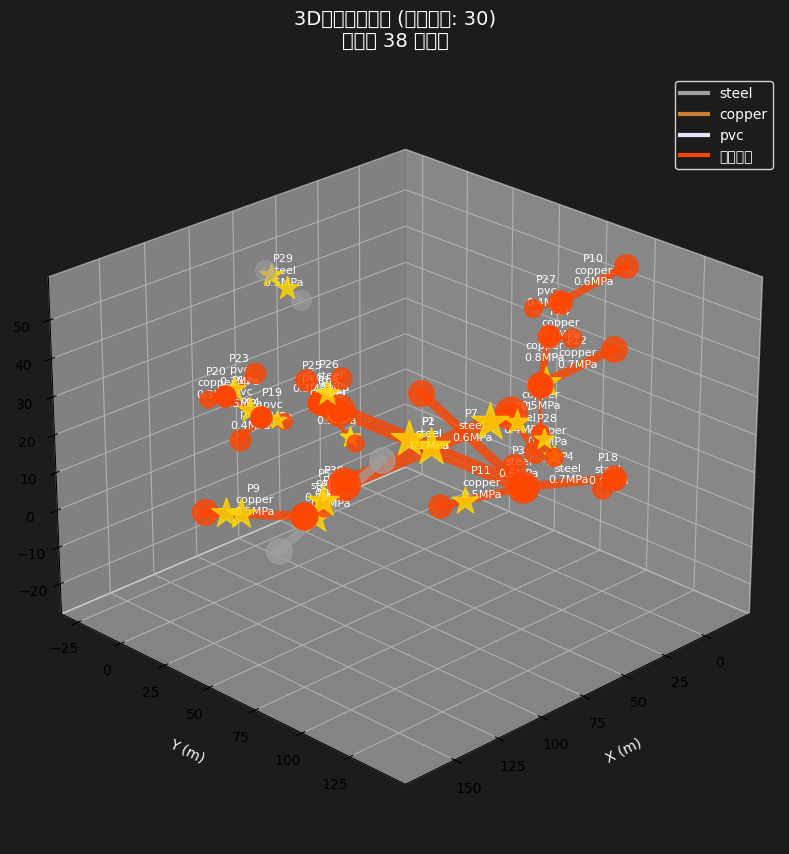

In [6]:
def visualize_network_3d_enhanced(pipes, collision_info=None, figsize=(15, 10)):
    """增强的3D可视化函数"""
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # 设置更好的视觉样式
    plt.style.use('dark_background')
    ax.set_facecolor('#1C1C1C')
    fig.patch.set_facecolor('#1C1C1C')
    
    # 材料颜色映射
    material_colors = {
        'steel': '#A0A0A0',  # 金属灰
        'copper': '#CD7F32',  # 铜色
        'pvc': '#E6E6FA'     # 浅紫色
    }
    
    # 管道类型对应的透明度
    type_alpha = {
        'main': 0.9,
        'secondary': 0.7,
        'branch': 0.5
    }
    
    # 创建管道碰撞字典用于快速查找
    collision_dict = {}
    if collision_info:
        for info in collision_info:
            collision_dict[info['pair']] = info
            collision_dict[(info['pair'][1], info['pair'][0])] = info
    
    # 绘制每个管道
    for i, pipe in enumerate(pipes):
        # 获取管道颜色
        base_color = material_colors.get(pipe['material'], '#FFFFFF')
        alpha = type_alpha.get(pipe['type'], 0.7)
        
        # 如果管道发生碰撞，调整其颜色
        for j, other_pipe in enumerate(pipes):
            if (i, j) in collision_dict:
                base_color = '#FF4500'  # 碰撞部分显示为红橙色
                alpha = 0.8
                break
        
        # 绘制主管道
        ax.plot([pipe['start'][0], pipe['end'][0]],
                [pipe['start'][1], pipe['end'][1]],
                [pipe['start'][2], pipe['end'][2]],
                color=base_color,
                linewidth=pipe['radius']*2,
                alpha=alpha)
        
        # 绘制管道端点球体
        for point in [pipe['start'], pipe['end']]:
            ax.scatter(*point, 
                      s=pipe['radius']*100,
                      color=base_color,
                      alpha=alpha)
        
        # 绘制弯头
        for bend in pipe['bends']:
            ax.scatter(*bend['position'],
                      s=pipe['radius']*150,
                      color='#FFD700',  # 金色
                      alpha=0.8,
                      marker='*')
        
        # 添加管道信息标签
        mid_point = (pipe['start'] + pipe['end']) / 2
        label = f'P{i+1}\n{pipe["material"]}\n{pipe["pressure"]:.1f}MPa'
        ax.text(mid_point[0], mid_point[1], mid_point[2],
                label,
                color='white',
                fontsize=8,
                horizontalalignment='center')
    
    # 设置坐标轴
    ax.set_xlabel('X (m)', color='white', labelpad=10)
    ax.set_ylabel('Y (m)', color='white', labelpad=10)
    ax.set_zlabel('Z (m)', color='white', labelpad=10)
    
    # 添加网格
    ax.grid(True, linestyle='--', alpha=0.2)
    
    # 设置标题
    title = f'3D管道网络分析 (总管道数: {len(pipes)})'
    if collision_info:
        title += f'\n检测到 {len(collision_info)} 处碰撞'
    ax.set_title(title, color='white', pad=20, fontsize=14)
    
    # 添加图例
    legend_elements = []
    for material, color in material_colors.items():
        legend_elements.append(plt.Line2D([0], [0], color=color, 
                                        label=material, linewidth=3))
    legend_elements.append(plt.Line2D([0], [0], color='#FF4500',
                                    label='碰撞管道', linewidth=3))
    ax.legend(handles=legend_elements, loc='upper right',
             facecolor='#1C1C1C', edgecolor='white', labelcolor='white')
    
    # 设置最佳视角
    ax.view_init(elev=25, azim=45)
    
    # 添加交互功能
    def on_mouse_move(event):
        if event.inaxes == ax:
            ax.view_init(elev=event.ydata, azim=event.xdata)
            fig.canvas.draw()
    
    fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)
    
    return fig

# 更新主程序的可视化部分
network = PipeNetwork(space_size=100)
pipes = network.create_complex_network(n_pipes=30)
collision_info = enhance_collision_detection(pipes)

# 使用新的可视化函数
fig = visualize_network_3d_enhanced(pipes, collision_info)
plt.show()

In [7]:
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots

def visualize_network_3d_interactive(pipes, collision_info=None):
    """使用Plotly创建交互式3D可视化"""
    
    # 创建3D图形
    fig = go.Figure()
    
    # 材料颜色映射
    material_colors = {
        'steel': '#A0A0A0',  # 金属灰
        'copper': '#CD7F32',  # 铜色
        'pvc': '#E6E6FA'     # 浅紫色
    }
    
    # 创建碰撞字典
    collision_dict = {}
    if collision_info:
        for info in collision_info:
            collision_dict[info['pair']] = info
            collision_dict[(info['pair'][1], info['pair'][0])] = info
    
    # 绘制管道
    for i, pipe in enumerate(pipes):
        # 获取基础颜色和属性
        base_color = material_colors.get(pipe['material'], '#FFFFFF')
        
        # 检查是否发生碰撞
        is_collision = False
        for j in range(len(pipes)):
            if (i, j) in collision_dict:
                is_collision = True
                break
        
        # 设置管道颜色
        pipe_color = '#FF4500' if is_collision else base_color
        
        # 创建管道主体
        fig.add_trace(go.Scatter3d(
            x=[pipe['start'][0], pipe['end'][0]],
            y=[pipe['start'][1], pipe['end'][1]],
            z=[pipe['start'][2], pipe['end'][2]],
            mode='lines',
            line=dict(
                color=pipe_color,
                width=pipe['radius']*3
            ),
            name=f'Pipe {i+1} ({pipe["material"]})',
            hovertemplate=(
                f"管道 #{i+1}<br>" +
                f"材料: {pipe['material']}<br>" +
                f"压力: {pipe['pressure']:.2f} MPa<br>" +
                f"流量: {pipe['flow_rate']:.2f} m³/h<br>" +
                f"半径: {pipe['radius']:.2f} m"
            )
        ))
        
        # 添加端点球体
        fig.add_trace(go.Scatter3d(
            x=[pipe['start'][0], pipe['end'][0]],
            y=[pipe['start'][1], pipe['end'][1]],
            z=[pipe['start'][2], pipe['end'][2]],
            mode='markers',
            marker=dict(
                size=pipe['radius']*10,
                color=pipe_color,
                opacity=0.8
            ),
            showlegend=False
        ))
        
        # 添加弯头
        if pipe.get('bends'):
            bend_positions = np.array([bend['position'] for bend in pipe['bends']])
            if len(bend_positions) > 0:
                fig.add_trace(go.Scatter3d(
                    x=bend_positions[:, 0],
                    y=bend_positions[:, 1],
                    z=bend_positions[:, 2],
                    mode='markers',
                    marker=dict(
                        symbol='diamond',
                        size=pipe['radius']*12,
                        color='#FFD700',
                        opacity=0.9
                    ),
                    name=f'Pipe {i+1} Bends',
                    showlegend=False
                ))
    
    # 设置布局
    fig.update_layout(
        title=dict(
            text=f'3D管道网络分析<br>总管道数: {len(pipes)} | 碰撞数: {len(collision_info) if collision_info else 0}',
            font=dict(size=20)
        ),
        scene=dict(
            xaxis_title='X (m)',
            yaxis_title='Y (m)',
            zaxis_title='Z (m)',
            aspectmode='data',
            camera=dict(
                up=dict(x=0, y=0, z=1),
                center=dict(x=0, y=0, z=0),
                eye=dict(x=1.5, y=1.5, z=1.5)
            ),
            annotations=[
                dict(
                    showarrow=False,
                    x=0,
                    y=0,
                    z=0,
                    text="",
                    xanchor="left",
                    xshift=10,
                    opacity=0.7
                )
            ]
        ),
        showlegend=True,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="right",
            x=0.99,
            bgcolor="rgba(255, 255, 255, 0.1)"
        ),
        template="plotly_dark"
    )
    
    return fig

# 使用新的可视化函数
network = PipeNetwork(space_size=100)
pipes = network.create_complex_network(n_pipes=30)
collision_info = enhance_collision_detection(pipes)

# 创建交互式3D图形
fig = visualize_network_3d_interactive(pipes, collision_info)

# 显示结果
fig.show()

In [8]:
# 在 visualize_network_3d_interactive 函数中更新布局设置

def visualize_network_3d_interactive(pipes, collision_info=None, width=1200, height=800):
    """使用Plotly创建交互式3D可视化"""
    # ...现有代码...
    
    # 更新布局设置
    fig.update_layout(
        # 设置图形尺寸
        width=width,  # 设置宽度（像素）
        height=height,  # 设置高度（像素）
        
        # 现有的布局设置
        title=dict(
            text=f'3D管道网络分析<br>总管道数: {len(pipes)} | 碰撞数: {len(collision_info) if collision_info else 0}',
            font=dict(size=20)
        ),
        scene=dict(
            xaxis_title='X (m)',
            yaxis_title='Y (m)',
            zaxis_title='Z (m)',
            aspectmode='data',
            camera=dict(
                up=dict(x=0, y=0, z=1),
                center=dict(x=0, y=0, z=0),
                eye=dict(x=1.5, y=1.5, z=1.5)
            ),
            # 调整场景尺寸比例
            aspectratio=dict(x=1, y=1, z=0.7)
        ),
        showlegend=True,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="right",
            x=0.99,
            bgcolor="rgba(255, 255, 255, 0.1)"
        ),
        template="plotly_dark",
        # 添加边距设置
        margin=dict(l=50, r=50, t=80, b=50)
    )
    
    return fig

# 使用新的参数调用可视化函数
network = PipeNetwork(space_size=100)
pipes = network.create_complex_network(n_pipes=30)
collision_info = enhance_collision_detection(pipes)

# 创建交互式3D图形，指定尺寸
fig = visualize_network_3d_interactive(pipes, collision_info, width=1500, height=900)

# 显示结果
fig.show()

In [11]:
def visualize_network_3d_interactive(pipes, collision_info=None, width=1200, height=800):
    """使用Plotly创建交互式3D可视化"""
    # 创建3D图形
    fig = go.Figure()
    
    # ...现有的管道绘制代码...
    
    # 添加碰撞点可视化
    if collision_info:
        collision_points = []
        for collision in collision_info:
            pipe1 = pipes[collision['pair'][0]]
            pipe2 = pipes[collision['pair'][1]]
            
            # 计算碰撞点（使用最近点的中点作为估计）
            points1 = [pipe1['start'], pipe1['end']] + [bend['position'] for bend in pipe1.get('bends', [])]
            points2 = [pipe2['start'], pipe2['end']] + [bend['position'] for bend in pipe2.get('bends', [])]
            
            min_dist = float('inf')
            collision_point = None
            
            # 找到两个管道之间的最近点
            for p1 in points1:
                for p2 in points2:
                    dist = np.linalg.norm(p1 - p2)
                    if dist < min_dist:
                        min_dist = dist
                        collision_point = (p1 + p2) / 2
            
            if collision_point is not None:
                collision_points.append({
                    'point': collision_point,
                    'severity': collision['severity'],
                    'pipes': collision['pair']
                })
        
        # 添加碰撞点标记
        if collision_points:
            x_cols = [p['point'][0] for p in collision_points]
            y_cols = [p['point'][1] for p in collision_points]
            z_cols = [p['point'][2] for p in collision_points]
            severities = [p['severity'] for p in collision_points]
            
            # 添加碰撞点散点图
            fig.add_trace(go.Scatter3d(
                x=x_cols,
                y=y_cols,
                z=z_cols,
                mode='markers',
                marker=dict(
                    size=15,
                    color=severities,  # 使用严重程度作为颜色
                    colorscale='Reds',  # 红色渐变色标
                    symbol='diamond',
                    line=dict(color='white', width=1),
                    opacity=0.8,
                    showscale=True,
                    colorbar=dict(
                        title='碰撞严重度',
                        titleside='right'
                    )
                ),
                name='碰撞点',
                hovertemplate=(
                    "碰撞位置<br>" +
                    "X: %{x:.2f}m<br>" +
                    "Y: %{y:.2f}m<br>" +
                    "Z: %{z:.2f}m<br>" +
                    "严重度: %{marker.color:.2%}<br>" +
                    "<extra></extra>"
                )
            ))
            
            # 为每个碰撞点添加注释
            for i, col_point in enumerate(collision_points):
                fig.add_trace(go.Scatter3d(
                    x=[col_point['point'][0]],
                    y=[col_point['point'][1]],
                    z=[col_point['point'][2]],
                    mode='text',
                    text=[f'C{i+1}'],
                    textposition='top center',
                    textfont=dict(
                        size=12,
                        color='white'
                    ),
                    showlegend=False
                ))
    
    # 更新布局
    fig.update_layout(
        # ...现有的布局设置...
        scene=dict(
            xaxis_title='X (m)',
            yaxis_title='Y (m)',
            zaxis_title='Z (m)',
            aspectmode='data',
            camera=dict(
                up=dict(x=0, y=0, z=1),
                center=dict(x=0, y=0, z=0),
                eye=dict(x=1.5, y=1.5, z=1.5)
            ),
            aspectratio=dict(x=1, y=1, z=0.7)
        ),
        title=dict(
            text=(f'3D管道网络分析<br>'
                  f'总管道数: {len(pipes)} | '
                  f'碰撞数: {len(collision_points) if collision_points else 0}'),
            font=dict(size=20)
        )
    )
    
    return fig

# 使用更新后的可视化函数
network = PipeNetwork(space_size=100)
pipes = network.create_complex_network(n_pipes=30)
collision_info = enhance_collision_detection(pipes)

# 创建带有碰撞点显示的3D图形
fig = visualize_network_3d_interactive(pipes, collision_info, width=1500, height=900)
fig.show()